# ブログランキングサイトのデータ処理・可視化

### 使用するモジュール・データの読み込み及び前処理

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#全体で使用するデータをインポート
dir_n = 1
df_na = pd.read_csv(f'traial_{dir_n}/data/category_name_list.csv',encoding='CP932')
df_ca = pd.read_csv(f'traial_{dir_n}/data/category_list.csv',encoding='CP932')

### ＜分析手法ver2＞  

1. 各カテゴリ毎、サブカテゴリ毎にデータをまとめる
2. 箱ひげ図を用いた分析(全体)
週間IN,OUTを対象とする。    
3. たてた戦略に基づく調査
4. 登録ジャンル数と閲覧数の関係を散布図により検討する。

### 1-1 カテゴリ毎 

In [41]:
cate_dict = {}
info_list = []
writer = pd.ExcelWriter('category_box.xlsx', engine = 'xlsxwriter')
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    df_bl = pd.read_csv(f'traial_{dir_n}/data/blog_list_{z}.csv',encoding='CP932')
    df_ra = pd.read_csv(f'traial_{dir_n}/data/ranking_list_{z}.csv',encoding='CP932')
    #ランキングページとブログ情報ページの統合
    #how=innerより、片方しか無いようなデータは消去される。
    df_all = pd.merge(df_bl,df_ra,on='ID')
    #収集中の時間差によりランキングに差が生まれてしまった時の為の重複除去
    df_all = df_all[~df_all.duplicated(subset='ID')].reset_index(drop=True)
    df_all
    df_all['週間OUT_'] = [int(x.replace('-','0')) for x in df_all['週間OUT']]
    cate_dict[name] = df_all
    df_all.to_excel(writer, sheet_name = name, index=False)

    #各カテゴリで結果をまとめる。
    info_dict = {}
    n_all = len(df_all)
    df_ac = df_all.dropna(subset=['更新日時']).reset_index(drop=True)
    n_ac = len(df_ac)
    n_non = n_all-n_ac
    ratio_ac = round(n_ac/n_all,4)
    week_in = df_all['週間IN'].sum()
    ratio_w_in = round(week_in/n_ac,4)  
    week_out = df_all['週間OUT_'].sum()
    ratio_w_out = round(week_out/n_ac,4) 
    month_in = df_all['月間IN'].sum()
    ratio_m_in = round(month_in/n_ac,4) 
    info_dict = ({'カテゴリ名':name,'記事総数':n_all,'アクティブ記事数':n_ac,'非アクティブ記事数':n_non,'アクティブ比率':ratio_ac,'総週間IN':week_in,'平均週間IN(アクティブ)':ratio_w_in,'総週間OUT':week_out,
                '平均週間OUT(アクティブ)':ratio_w_out,'総月間IN':month_in,'平均月間IN(アクティブ)':ratio_m_in})
    info_list.append(info_dict)
#Excelファイルを保存
writer.save()
#Excelファイルを閉じる
writer.close()
df_info_cate = pd.DataFrame(info_list)
df_info_cate

c:\Users\matsuura\anaconda3\envs\py38\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


,カテゴリ名,記事総数,アクティブ記事数,非アクティブ記事数,アクティブ比率,総週間IN,平均週間IN(アクティブ),総週間OUT,平均週間OUT(アクティブ),総月間IN,平均月間IN(アクティブ)
0,インターネット・コンピュータ,962,659,303,0.6850,65306,99.0986,563775,855.5008,280653,425.8771
1,エンターテインメント,3015,2019,996,0.6697,509272,252.2397,4024494,1993.3105,2214275,1096.7187
2,生活・文化,1972,1502,470,0.7617,190743,126.9927,448591,298.6625,837094,557.3196
3,社会・経済,3659,2568,1091,0.7018,944015,367.6071,7412577,2886.5175,3914947,1524.5121
4,健康と医療,2000,1395,605,0.6975,201415,144.3835,548294,393.0423,880754,631.3649
5,ペット,2105,1527,578,0.7254,784964,514.0563,2160585,1414.9214,3511416,2299.5521
6,グルメ,1851,1424,427,0.7693,241045,169.2732,1548675,1087.5527,1061184,745.2135
7,住まい,905,638,267,0.7050,76559,119.9984,146217,229.1803,335328,525.5925
8,花・ガーデニング,631,495,136,0.7845,191538,386.9455,1271614,2568.9172,852210,1721.6364
9,育児,861,642,219,0.7456,71452,111.2960,216056,336.5358,316100,492.3676


### 1-2サブカテゴリ毎

In [42]:
subcate_dict = {}
total_info_list = []
subcate_info_dict = {}
all_subcategory_list = []
i = 0
for z in range(0,len(df_na)):
    info_list = []
    name = df_na['カテゴリ名'][z]
    df_all = cate_dict[name]
    _df_ca = df_ca[df_ca['カテゴリ'] == name]
    subcate_list = _df_ca['サブカテゴリ'].unique()
    _df = pd.DataFrame()
    for cate in subcate_list:
        #各サブカテゴリ毎のdfを作成
        subcategories = _df_ca[_df_ca['サブカテゴリ']==cate]['タイトル'].to_list()
        for subcategory in subcategories:
            subcategory = ("'")+subcategory+("'")
            __df = df_all[df_all['カテゴリ'].str.contains(subcategory,regex=False)]
            _df = pd.concat([_df, __df])
            _df = _df[~_df.duplicated()].reset_index(drop=True)
        subcate_dict[cate] = _df
        _df = pd.DataFrame()
        
        #各サブカテゴリで結果をまとめる。
        df = pd.DataFrame()
        info_dict = {}
        df=subcate_dict[cate]
        n_all = len(df)
        if n_all == 0:
            pass
        #記事が一つもなければ考察する必要なし。
        else:
            df_ac = df.dropna(subset=['更新日時']).reset_index(drop=True)
            n_ac = len(df_ac)
            if n_all >= 30:
                over = 0
            else:
                over = 1 
            if n_ac >= 30:
                over_ac = 0
            else:
                over_ac = 1 
            n_non = n_all-n_ac
            ratio_ac = round(n_ac/n_all,4)
            week_in = df['週間IN'].sum()
            ratio_w_in = round(week_in/n_ac,4)
            df['週間OUT_'] = [int(x.replace('-','0')) for x in df['週間OUT']]
            week_out = df['週間OUT_'].sum()
            ratio_w_out = round(week_out/n_ac,4) 
            month_in = df['月間IN'].sum()
            ratio_m_in = round(month_in/n_ac,4) 
            info_dict = ({'カテゴリ名':cate,'記事総数':n_all,'アクティブ記事数':n_ac,'非アクティブ記事数':n_non,'記事数>=30':over,'アクティブ記事数>=30':over_ac,'アクティブ比率':ratio_ac,'総週間IN':week_in,'週間IN比率(アクティブ)':ratio_w_in,'総週間OUT':week_out,
                        '週間OUT比率(アクティブ)':ratio_w_out,'総月間IN':month_in,'月間IN比率(アクティブ)':ratio_m_in})
            info_list.append(info_dict)
            total_info_list.append(info_dict)
    df_info_sub = pd.DataFrame(info_list)
    subcate_info_dict[name] = df_info_sub
    df_info_sub_total = pd.DataFrame(total_info_list)

C:\Users\matsuura\AppData\Local\Temp/ipykernel_8720/2820118580.py:46: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio_w_in = round(week_in/n_ac,4)
C:\Users\matsuura\AppData\Local\Temp/ipykernel_8720/2820118580.py:49: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio_w_out = round(week_out/n_ac,4)
C:\Users\matsuura\AppData\Local\Temp/ipykernel_8720/2820118580.py:51: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio_m_in = round(month_in/n_ac,4)
C:\Users\matsuura\AppData\Local\Temp/ipykernel_8720/2820118580.py:49: RuntimeWarning: invalid value encountered in longlong_scalars
  ratio_w_out = round(week_out/n_ac,4)


### 2-1カテゴリ毎で箱ひげ図

In [43]:
w_in = [] 
w_out = []
m_in = []
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    _df = cate_dict[name]
    df_ac = _df.dropna(subset=['更新日時']).reset_index(drop=True)
    w_in.append(df_ac['週間IN'].to_numpy())
    w_out.append(df_ac['週間OUT_'].to_numpy())
    m_in.append(df_ac['月間IN'].to_numpy())


In [181]:
#これでexcelに持っていける
w = pd.DataFrame(w_in)
w = w.T
w.to_csv('w_in.csv')

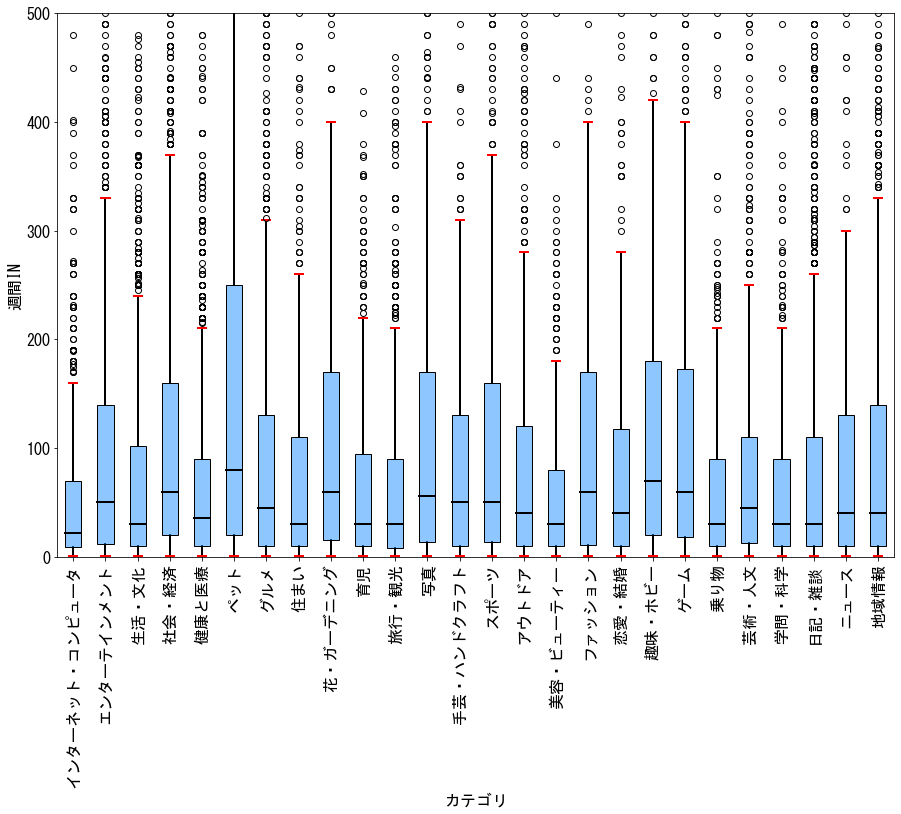

In [44]:
#週間IN
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 500)
bp=ax.boxplot(w_in,
              labels=df_na['カテゴリ名'].to_list(),
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )

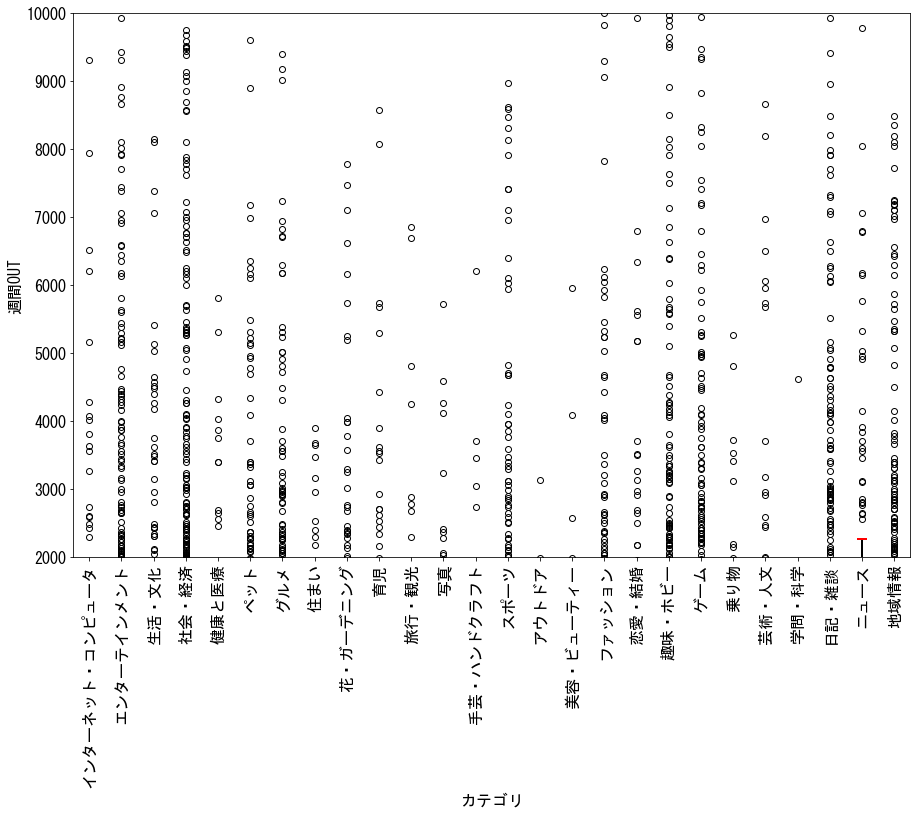

In [9]:
#週間OUT
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間OUT')
ax.set_ylim(2000,10000)
bp=ax.boxplot(w_out,
              labels=df_na['カテゴリ名'].to_list(),
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )


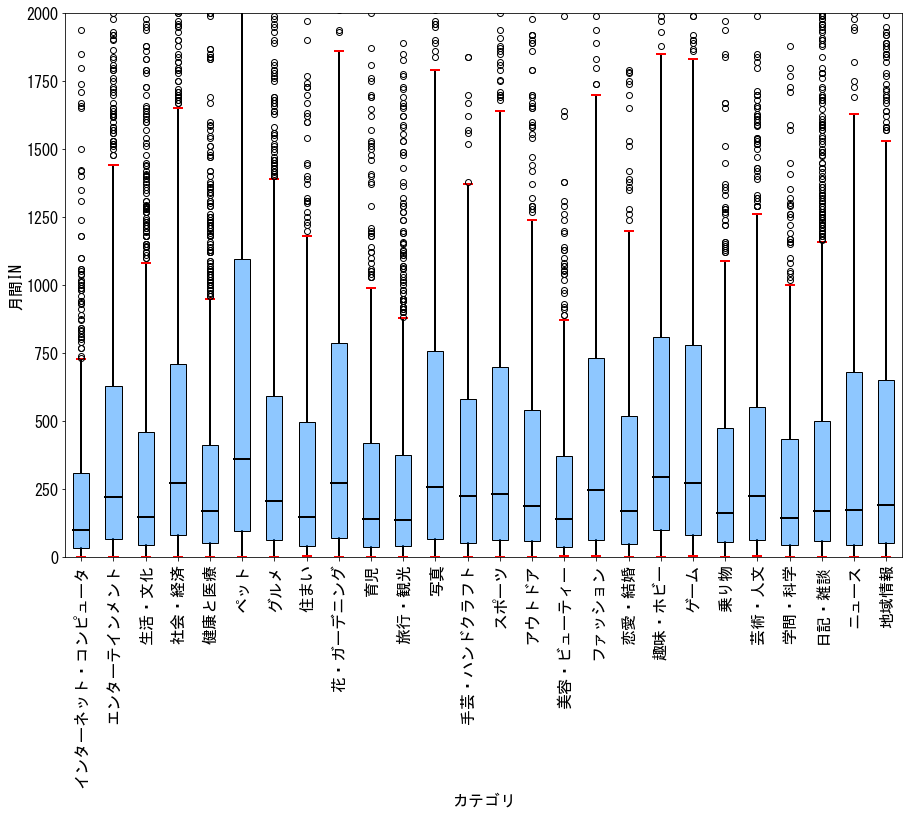

In [45]:
#月間IN
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('月間IN')
ax.set_ylim(0, 2000)
bp=ax.boxplot(m_in,
              labels=df_na['カテゴリ名'].to_list(),
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )

### 3 カテゴリ毎に上位90位の週間データを箱ひげ図で表す
第一四分位数の大きさで箱ひげ図の順番をソートする。(下位25%が低い順)

In [46]:
w_in_90 = pd.DataFrame() 
w_out_90 = pd.DataFrame() 
m_in_90 = pd.DataFrame() 
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    _df = cate_dict[name]
    df_90 = _df.iloc[:90,:]
    w_in_90[name] = df_90['週間IN'].to_list()
    w_out_90[name] = df_90['週間OUT_'].to_list()
    m_in_90[name] = df_90['月間IN'].to_list()

In [47]:
statis =w_in_90.describe().T.reset_index().sort_values('25%')
sort_name = statis['index'].to_list()

In [48]:
w_in_90 = pd.DataFrame() 
w_out_90 = pd.DataFrame() 
m_in_90 = pd.DataFrame() 
for z in range(0,len(sort_name)):
    name = sort_name[z]
    _df = cate_dict[name]
    df_90 = _df.iloc[:90,:]
    w_in_90[name] = df_90['週間IN'].to_list()
    w_out_90[name] = df_90['週間OUT_'].to_list()
    m_in_90[name] = df_90['月間IN'].to_list()

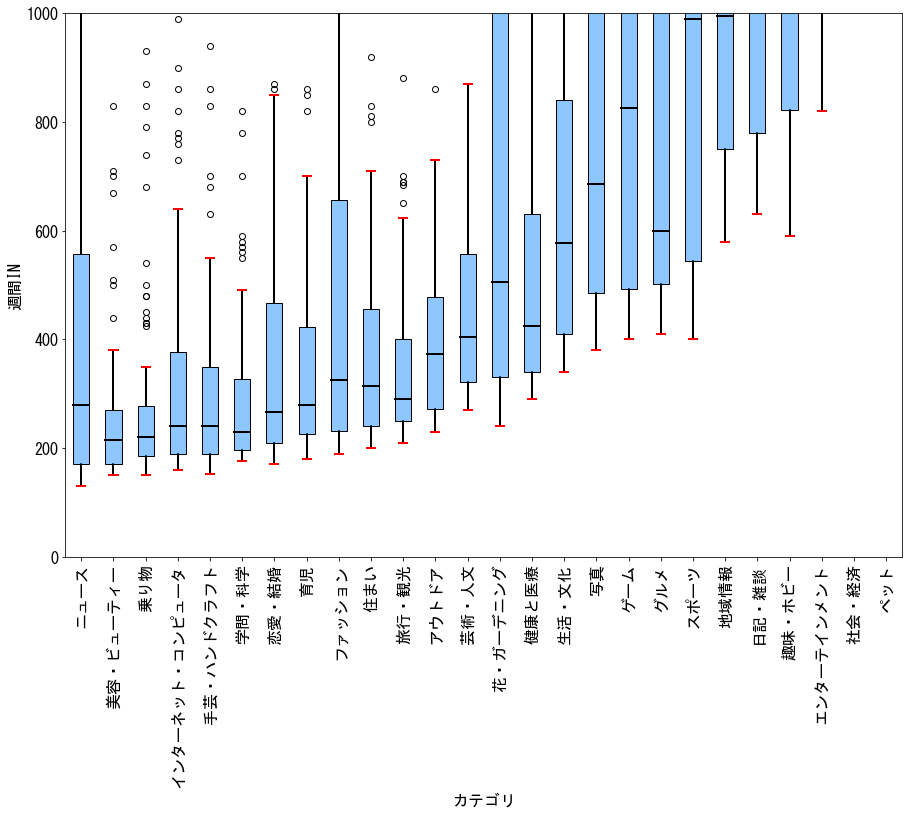

In [14]:
#週間IN
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
ax1.set_xlabel('カテゴリ')
ax1.set_ylabel('週間IN')
ax1.set_ylim(0, 1000)
bp=ax1.boxplot(w_in_90,
              labels=sort_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )
              

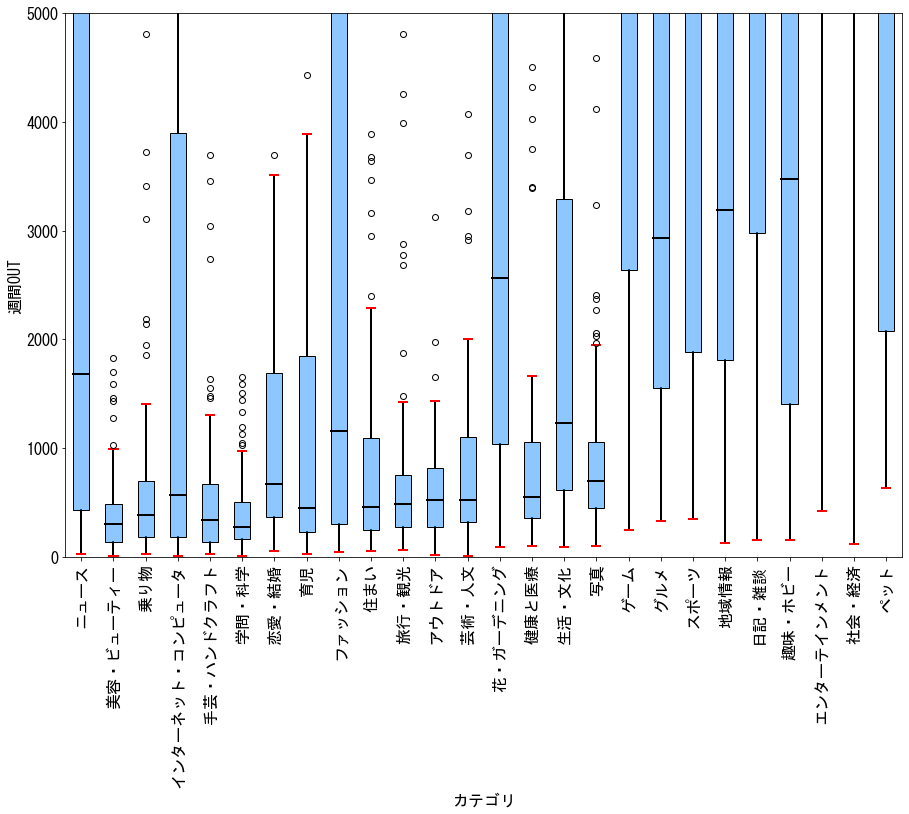

In [15]:
#週間OUT
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax1 = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
ax1.set_xlabel('カテゴリ')
ax1.set_ylabel('週間OUT')
ax1.set_ylim(0, 5000)
bp=ax1.boxplot(w_out_90,
              labels=sort_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )
              

##### 散布図によるINとOUTの関係
週間IN,OUTの箱ひげ図の結果から、
1.ガーデニング,2.ニュース,3.ファッションの分野が週間INの閾値が低く、比較的多くのOUTを獲得できる市場だといえる。(OUT2000が基準)  
しかし、上位90の中にもOUTが0に近い人がいる。  
↳IN/OUTの相関を見ることで、OUTが2000を超えている人のINがどの程度かを確認する。

          花・ガーデニング  花・ガーデニング
花・ガーデニング  1.000000  0.954749
花・ガーデニング  0.954749  1.000000
          ニュース      ニュース
ニュース  1.000000  0.649771
ニュース  0.649771  1.000000
          ファッション    ファッション
ファッション  1.000000  0.877293
ファッション  0.877293  1.000000


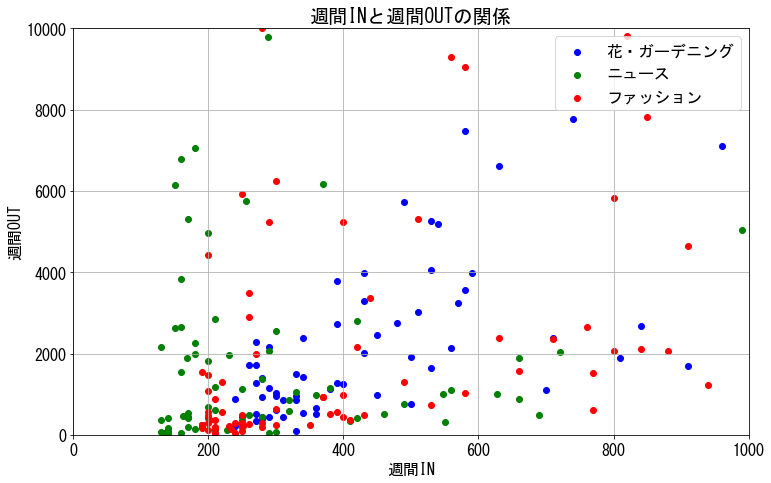

In [49]:
x1 = w_in_90['花・ガーデニング']
y1 = w_out_90['花・ガーデニング']
x2 = w_in_90['ニュース']
y2 = w_out_90['ニュース']
x3 = w_in_90['ファッション']
y3 = w_out_90['ファッション']

df1 = pd.DataFrame([x1,y1]).T
coef1 = df1.corr()
print(coef1)
df2 = pd.DataFrame([x2,y2]).T
coef2 = df2.corr()
print(coef2)
df3 = pd.DataFrame([x3,y3]).T
coef3 = df3.corr()
print(coef3)



fig, ax = plt.subplots()
c1,c2,c3 = "blue","green","red"      # 各プロットの色
l1,l2,l3 = "花・ガーデニング","ニュース","ファッション"  # 各ラベル
fig.set_size_inches(11, 7)
ax.set_xlabel('週間IN')  # x軸ラベル
ax.set_ylabel('週間OUT')  # y軸ラベル
ax.set_title('週間INと週間OUTの関係') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
ax.set_xlim([0, 1000]) # x方向の描画範囲を指定
ax.set_ylim([0, 10000])    # y方向の描画範囲を指定
ax.scatter(x1, y1, color=c1, label=l1)
ax.scatter(x2, y2, color=c2, label=l2)
ax.scatter(x3, y3, color=c3, label=l3)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定

週間INは自分で1端末で100以上程度稼げることを考えると、週間ＯＵＴ2000を超えるのに余り関係がない。
すなわち、ジャンルとしてはこの3つがいいかも。

Ｑ.大きなカテゴリで見る必要性について(詳細なジャンルで見た方がいいのでは)
Ａ.ブログを探すとき、多くの人はブラウザを使い、ランキングサイトを使うのは一部。ランキングサイトを使う人はブログ閲覧が趣味である可能性が高い。
詳細なジャンル分析も確かに大事だが、カテゴリランキングで検索される可能性を考慮するとこの見方に価値がある。



##### 上記3種のサブカテゴリ単位での検討

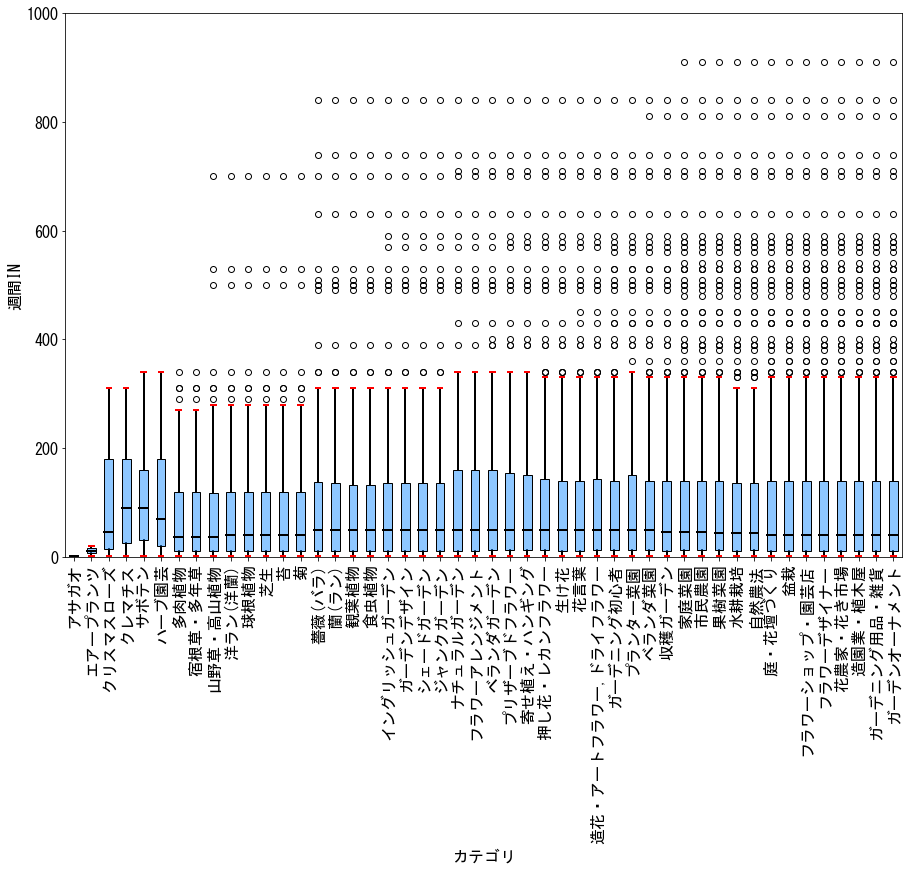

In [22]:
#20件以下を省略しないver
subcate_dict = {}
total_info_list = []
all_subcategory_list = []
subcate_name = []
w_in = []
w_out = []
name_list = ["花・ガーデニング"]
for name in name_list:
    df_all = cate_dict[name]
    #df_all = df_all[df_all['週間IN'] >= 50].reset_index(drop=True)
    #df_all = df_all[df_all['週間OUT'] >= 50].reset_index(drop=True)
    _df_ca = df_ca[df_ca['カテゴリ'] == name]
    subcate_list = _df_ca['サブカテゴリ'].unique()
    _df = pd.DataFrame()
    
    for subcate in subcate_list:
        #各サブカテゴリ毎のdfを作成
        
        subcategories = _df_ca[_df_ca['サブカテゴリ']==subcate]['タイトル'].to_list()
        for subcategory in subcategories:
            subcategory = ("'")+subcategory+("'")
            __df = df_all[df_all['カテゴリ'].str.contains(subcategory,regex=False)]
            _df = pd.concat([_df, __df])
            _df = _df[~_df.duplicated()].reset_index(drop=True)
        w_in.append(_df['週間IN'].to_numpy())
        w_out.append(_df['週間OUT_'].to_numpy())
        subcate_name.append(subcate)
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 1000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_in,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )

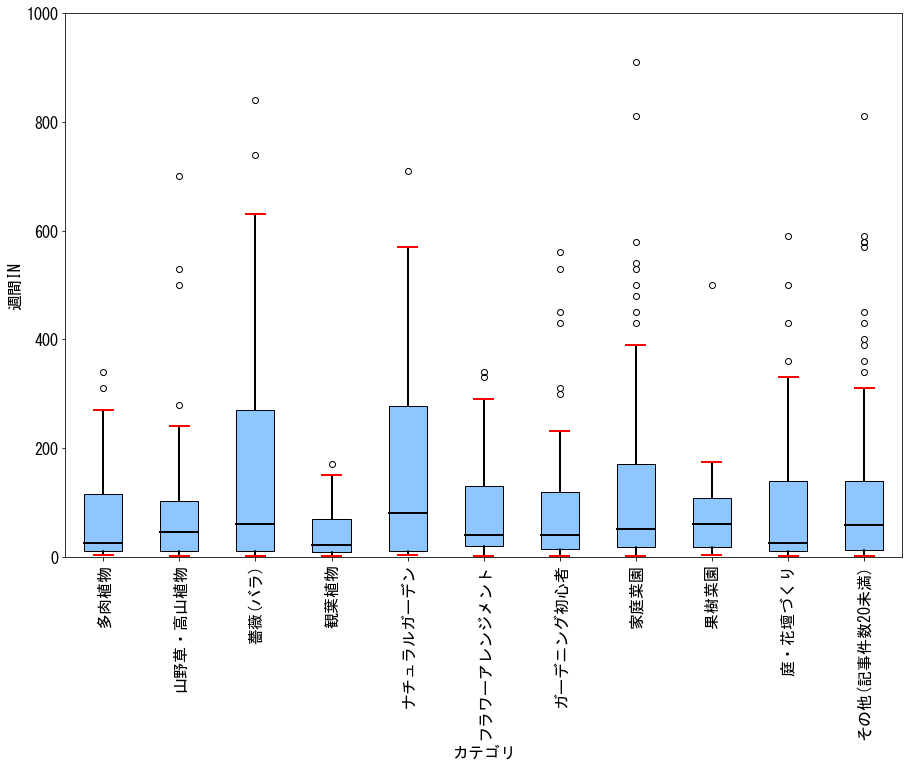

In [23]:
#flower weekly in

#3種類総合での比較に用いる。
from operator import itemgetter
final_in_list = []
final_out_list = []
final_name = []
subcate_dict = {}
total_info_list = []
all_subcategory_list = []
subcate_name = []
w_in = []
w_out = []
name_list = ["花・ガーデニング"]
for name in name_list:
    df_all = cate_dict[name]
    sub_info = subcate_info_dict[name]
    others = sub_info[sub_info['記事総数']<20]['カテゴリ名'].to_list()
    _df_ca = df_ca[df_ca['カテゴリ'] == name]
    subcate_list = _df_ca['サブカテゴリ'].unique()
    _df = pd.DataFrame()
    df_other = pd.DataFrame()
    for subcate in subcate_list:
        #各サブカテゴリ毎のdfを作成
        _df = pd.DataFrame()
        subcategories = _df_ca[_df_ca['サブカテゴリ']==subcate]['タイトル'].to_list()
        for subcategory in subcategories:
            subcategory = ("'")+subcategory+("'")
            __df = df_all[df_all['カテゴリ'].str.contains(subcategory,regex=False)]
            _df = pd.concat([_df, __df])
            _df = _df[~_df.duplicated()].reset_index(drop=True)
        if len(_df) < 20:
            df_other = pd.concat([df_other, _df])
        else:
            w_in.append(_df['週間IN'].to_numpy())
            w_out.append(_df['週間OUT_'].to_numpy())
            subcate_name.append(subcate)
    if len(df_other) != 0:
        w_in.append(df_other['週間IN'].to_numpy())
        w_out.append(df_other['週間OUT_'].to_numpy())
        subcate_name.append('その他(記事件数20未満)')
final_in_list.append(list(itemgetter(2,4,8)(w_in)))
final_out_list.append(list(itemgetter(2,4,8)(w_out)))
final_name.append(list(itemgetter(2,4,8)(subcate_name)))
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 1000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_in,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )



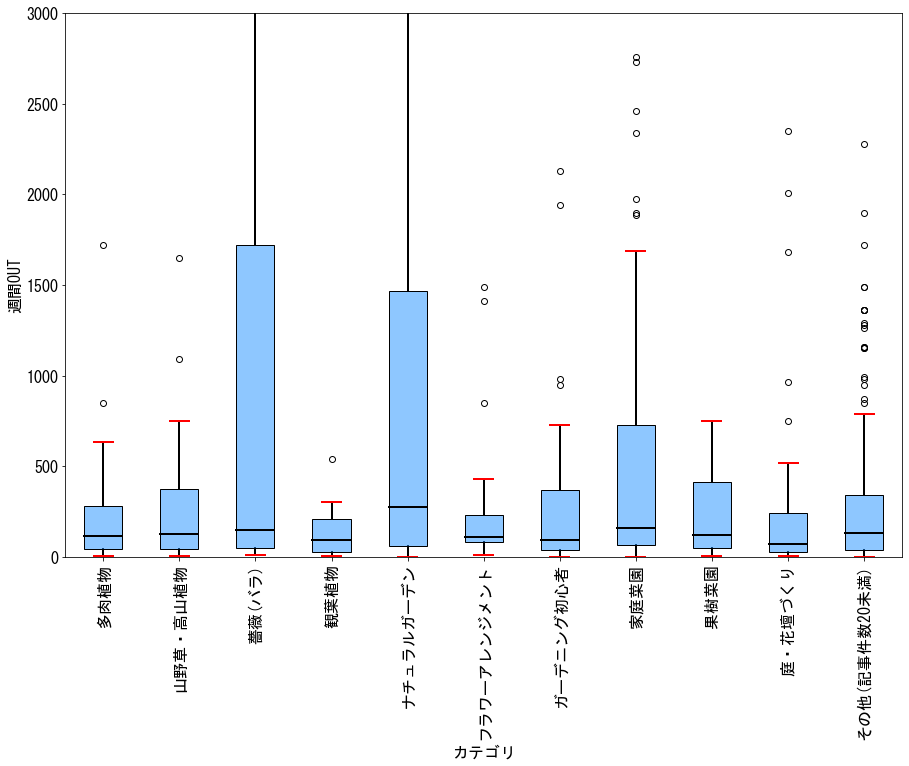

In [24]:
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間OUT')
ax.set_ylim(0, 3000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_out,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )


結果より、特におすすめなのは、薔薇、ナチュラルガーデン、家庭菜園

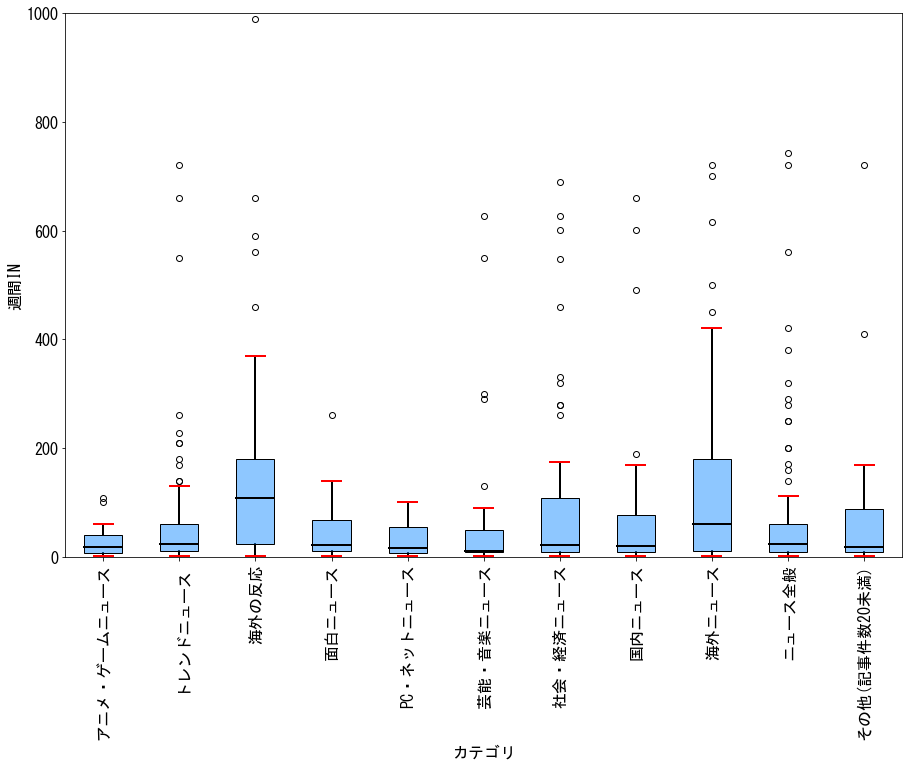

In [50]:
from operator import itemgetter
final_in_list = []
final_out_list = []
final_name = []
subcate_dict = {}
total_info_list = []
all_subcategory_list = []
subcate_name = []
w_in = []
w_out = []
name_list = ["ニュース"]
for name in name_list:
    df_all = cate_dict[name]
    sub_info = subcate_info_dict[name]
    others = sub_info[sub_info['記事総数']<20]['カテゴリ名'].to_list()
    #df_all = df_all[df_all['週間IN'] >= 50].reset_index(drop=True)
    #df_all = df_all[df_all['週間OUT'] >= 50].reset_index(drop=True)
    _df_ca = df_ca[df_ca['カテゴリ'] == name]
    subcate_list = _df_ca['サブカテゴリ'].unique()
    _df = pd.DataFrame()
    df_other = pd.DataFrame()
    for subcate in subcate_list:
        #各サブカテゴリ毎のdfを作成
        _df = pd.DataFrame()
        subcategories = _df_ca[_df_ca['サブカテゴリ']==subcate]['タイトル'].to_list()
        for subcategory in subcategories:
            subcategory = ("'")+subcategory+("'")
            __df = df_all[df_all['カテゴリ'].str.contains(subcategory,regex=False)]
            _df = pd.concat([_df, __df])
            _df = _df[~_df.duplicated()].reset_index(drop=True)
        if len(_df) < 20:
            df_other = pd.concat([df_other, _df])
        else:
            w_in.append(_df['週間IN'].to_numpy())
            w_out.append(_df['週間OUT_'].to_numpy())
            subcate_name.append(subcate)
    if len(df_other) != 0:
        w_in.append(df_other['週間IN'].to_numpy())
        w_out.append(df_other['週間OUT_'].to_numpy())
        subcate_name.append('その他(記事件数20未満)')
final_in_list.append(list(itemgetter(2,8)(w_in)))
final_out_list.append(list(itemgetter(2,8)(w_out)))
final_name.append(list(itemgetter(2,8)(subcate_name)))

plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 1000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_in,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )



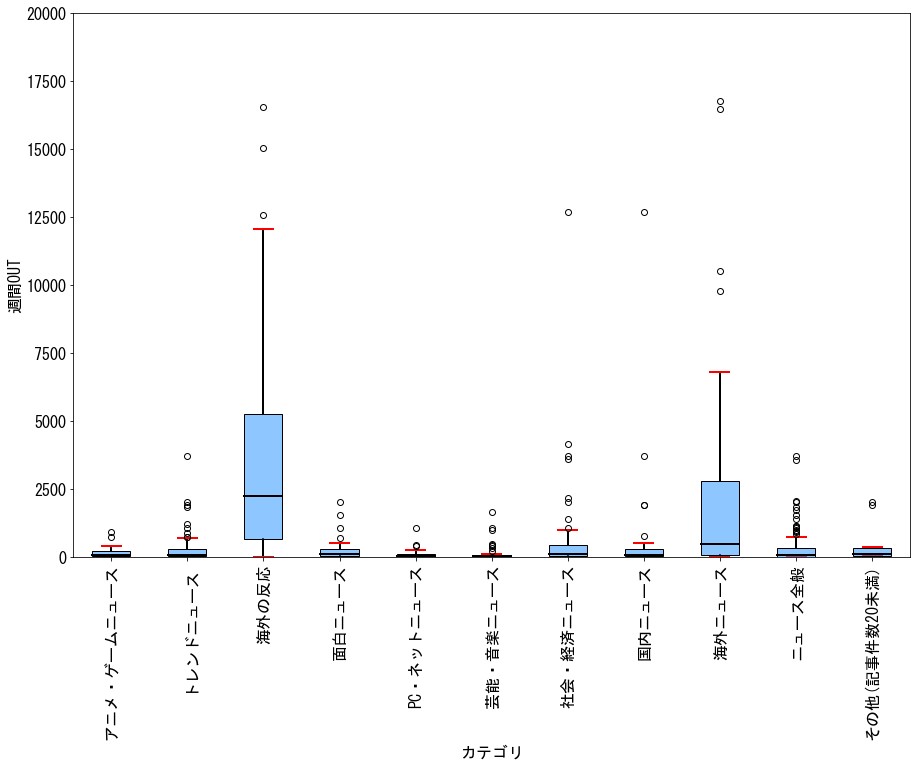

In [18]:
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間OUT')
ax.set_ylim(0, 20000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_out,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )

特におすすめなのは海外の反応

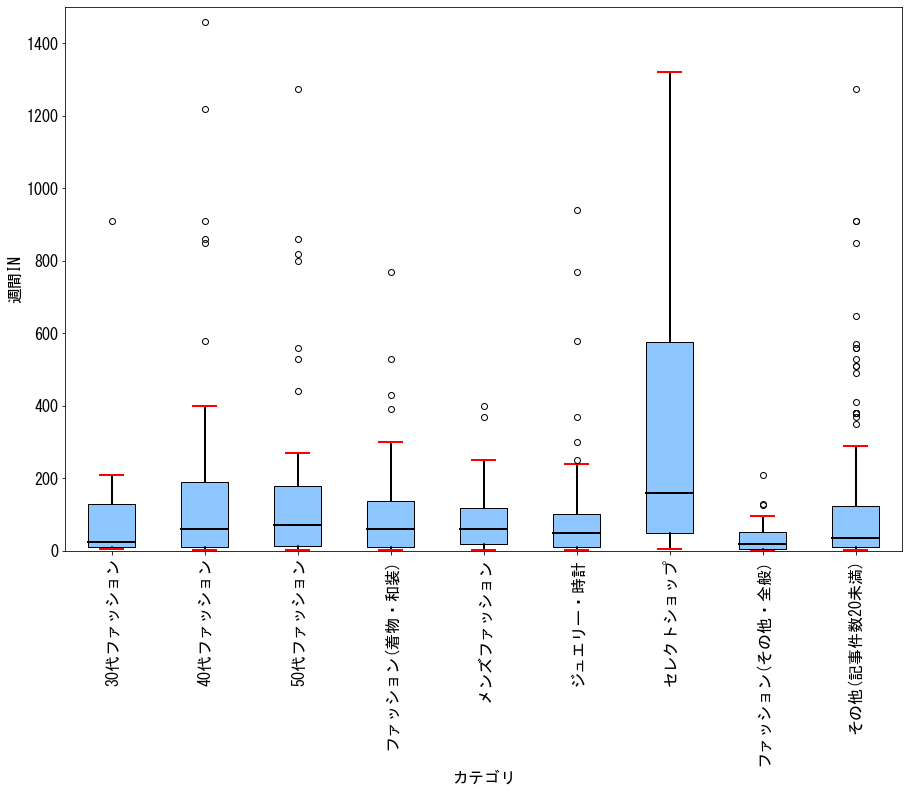

In [51]:
subcate_dict = {}
total_info_list = []
all_subcategory_list = []
subcate_name = []
w_in = []
w_out = []
name_list = ["ファッション"]
for name in name_list:
    df_all = cate_dict[name]
    sub_info = subcate_info_dict[name]
    others = sub_info[sub_info['記事総数']<20]['カテゴリ名'].to_list()
    #df_all = df_all[df_all['週間IN'] >= 50].reset_index(drop=True)
    #df_all = df_all[df_all['週間OUT'] >= 50].reset_index(drop=True)
    _df_ca = df_ca[df_ca['カテゴリ'] == name]
    subcate_list = _df_ca['サブカテゴリ'].unique()
    _df = pd.DataFrame()
    df_other = pd.DataFrame()
    for subcate in subcate_list:
        #各サブカテゴリ毎のdfを作成
        _df = pd.DataFrame()
        subcategories = _df_ca[_df_ca['サブカテゴリ']==subcate]['タイトル'].to_list()
        for subcategory in subcategories:
            subcategory = ("'")+subcategory+("'")
            __df = df_all[df_all['カテゴリ'].str.contains(subcategory,regex=False)]
            _df = pd.concat([_df, __df])
            _df = _df[~_df.duplicated()].reset_index(drop=True)
        if len(_df) < 20:
            df_other = pd.concat([df_other, _df])
        else:
            w_in.append(_df['週間IN'].to_numpy())
            w_out.append(_df['週間OUT_'].to_numpy())
            subcate_name.append(subcate)
    if len(df_other) != 0:
        w_in.append(df_other['週間IN'].to_numpy())
        w_out.append(df_other['週間OUT_'].to_numpy())
        subcate_name.append('その他(記事件数20未満)')
final_in_list.append(list(itemgetter(1,2)(w_in)))
final_out_list.append(list(itemgetter(1,2)(w_out)))
final_name.append(list(itemgetter(1,2)(subcate_name)))

plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 1500)
plt.xticks(rotation=90)
bp=ax.boxplot(w_in,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )



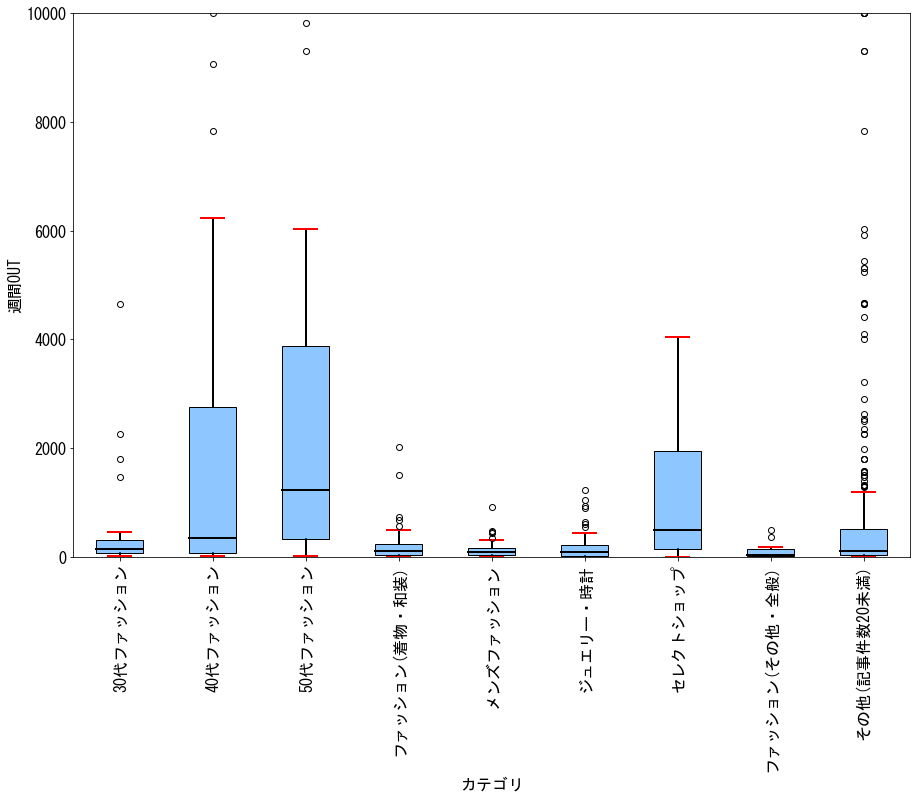

In [20]:
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間OUT')
ax.set_ylim(0, 10000)
plt.xticks(rotation=90)
bp=ax.boxplot(w_out,
              labels=subcate_name,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
)

おすすめは40,50代ファッションだが、出来る人が限られる

In [28]:
f_n = sum(final_name, [])
f_i = sum(final_in_list, [])
f_o = sum(final_out_list, [])
#f_n[0], f_n[1],f_n[2], f_n[3],f_n[4], f_n[5], f_n[6]= f_n[3], f_n[6],f_n[4], f_n[5],f_n[0], f_n[1], f_n[2] 
#f_i[0], f_i[1],f_i[2], f_i[3],f_i[4], f_i[5], f_i[6]= f_i[3], f_i[6],f_i[4], f_i[5],f_i[0], f_i[1], f_i[2]
#f_o[0], f_o[1],f_o[2], f_o[3],f_o[4], f_o[5], f_o[6]= f_o[3], f_o[6],f_o[4], f_o[5],f_o[0], f_o[1], f_o[2]  


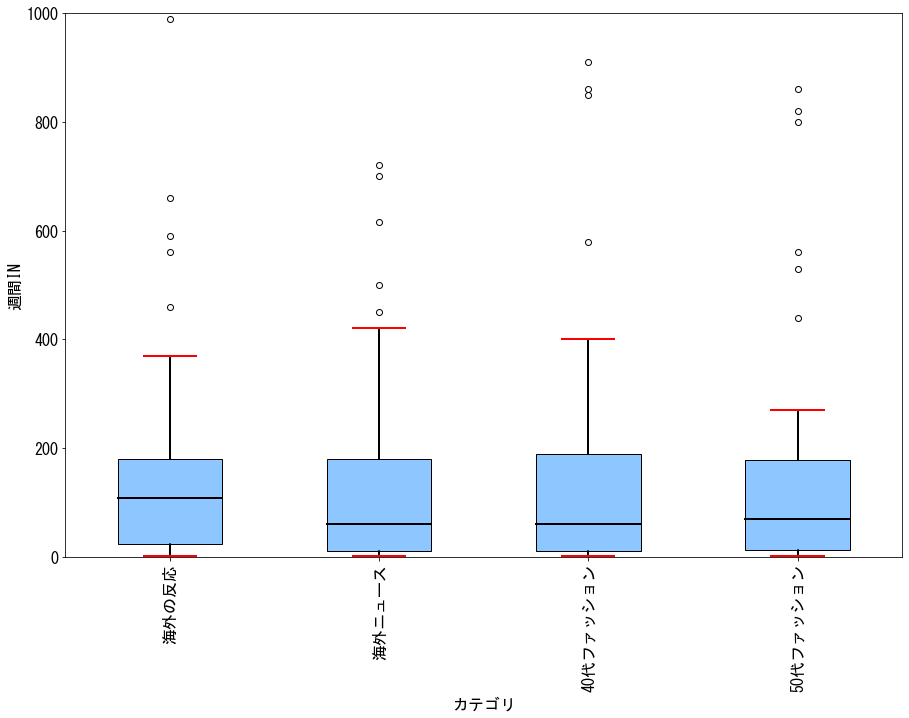

In [52]:
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 1000)
plt.xticks(rotation=90)
bp=ax.boxplot(f_i,
              labels=f_n,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )



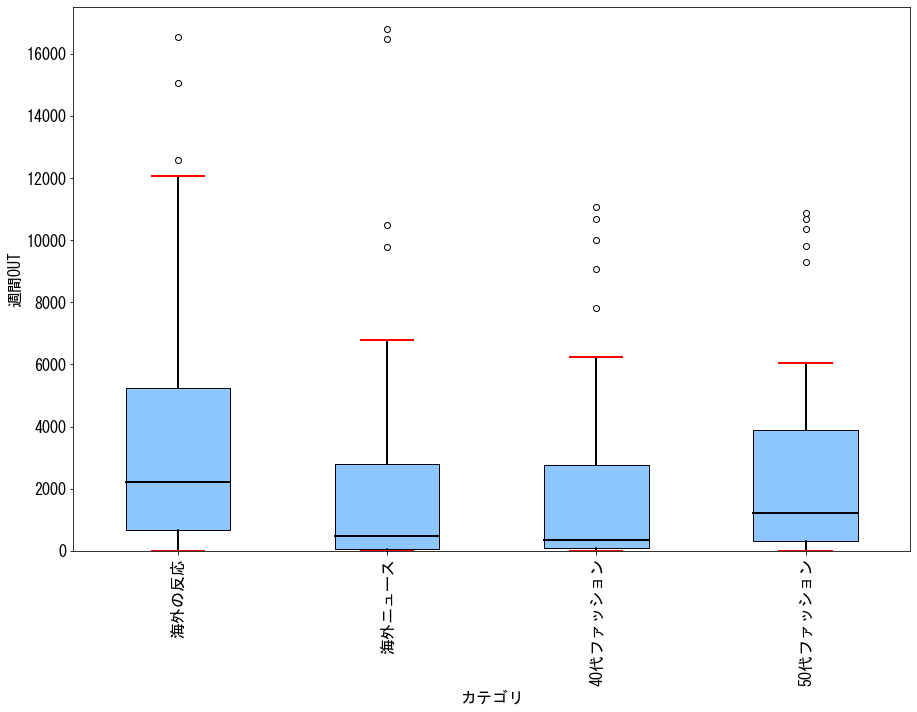

In [30]:
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ')
ax.set_ylabel('週間OUT')
ax.set_ylim(0, 17500)
plt.xticks(rotation=90)
bp=ax.boxplot(f_o,
              labels=f_n,
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
            )

ここから、海外の反応、海外ニュース、薔薇が誰でもできる。
↳もう少し深堀する。
これらは、カテゴリランキングでも上位を狙えるのが強み

### 4 カテゴリ数と週間IN,OUTの関係(箱ひげ図)

In [77]:
df_total = pd.DataFrame()
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    _df = cate_dict[name]
    df_total = pd.concat([df_total, _df])
df_total = df_total.reset_index(drop=True).drop('週間OUT',axis=1).drop('順位',axis=1)
#同じブログをまとめる
unique_list = df_total['ID'].unique()
lis = []
for i in range(0,len(unique_list)):
    dfs = df_total[df_total['ID'] == unique_list[i]].reset_index(drop=True)
    if len(dfs) >= 2:
        c = 0
        d = {}
        d['ID'] = dfs['ID'][0]
        d['カテゴリ'] = dfs['カテゴリ'][0]
        d['紹介文'] = dfs['紹介文'][0]
        d['ブログ名'] = dfs['ブログ名'][0]
        for j in range(0,len(dfs)):
            if ~pd.isna(dfs['更新日時'][j]) == -1:
                d['更新日時'] = dfs['更新日時'][j]  
                c += 1
            if c == 0:
                d['更新日時'] = dfs['更新日時'][0] 
        d['月間IN'] = dfs['月間IN'].sum()
        d['週間IN'] = dfs['週間IN'].sum()
        d['週間OUT_'] = dfs['週間OUT_'].sum()
        lis.append(d)
_df = pd.DataFrame(lis)
df_total = pd.concat([df_total, _df])
df_total = df_total[~df_total.duplicated(subset='ID',keep='last')].reset_index(drop=True) 

lis = []
for i in range(0,len(df_total)):
    n = (df_total['カテゴリ'][i].count(','))+1
    lis.append(n)
df_total['カテゴリ数'] = lis

In [79]:
df_total = pd.DataFrame()
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    _df = cate_dict[name]
    df_total = pd.concat([df_total, _df])
df_total = df_total.reset_index(drop=True).drop('週間OUT',axis=1).drop('順位',axis=1)
#同じブログをまとめる
unique_list = df_total['ID'].unique()
lis = []
for i in range(0,len(unique_list)):
    dfs = df_total[df_total['ID'] == unique_list[i]].reset_index(drop=True)
    if len(dfs) >= 2:
        break
dfs

,ID,カテゴリ,紹介文,ブログ名,更新日時,月間IN,週間IN,週間OUT_
0,2030706,"['オープンソース', '人工知能・AI', 'システムエンジニア']",シミュレーションで実物を扱わなくても仕事ができる環境を目指す。つまり家に引きこもって外に出な...,シミュレーションの世界に引きこもる部屋,07月13日 20:26,5193,1080,1539
1,2030706,"['オープンソース', '人工知能・AI', 'システムエンジニア']",シミュレーションで実物を扱わなくても仕事ができる環境を目指す。つまり家に引きこもって外に出な...,シミュレーションの世界に引きこもる部屋,07月14日 19:44,570,113,162


16374
4706
2791
1202
1844


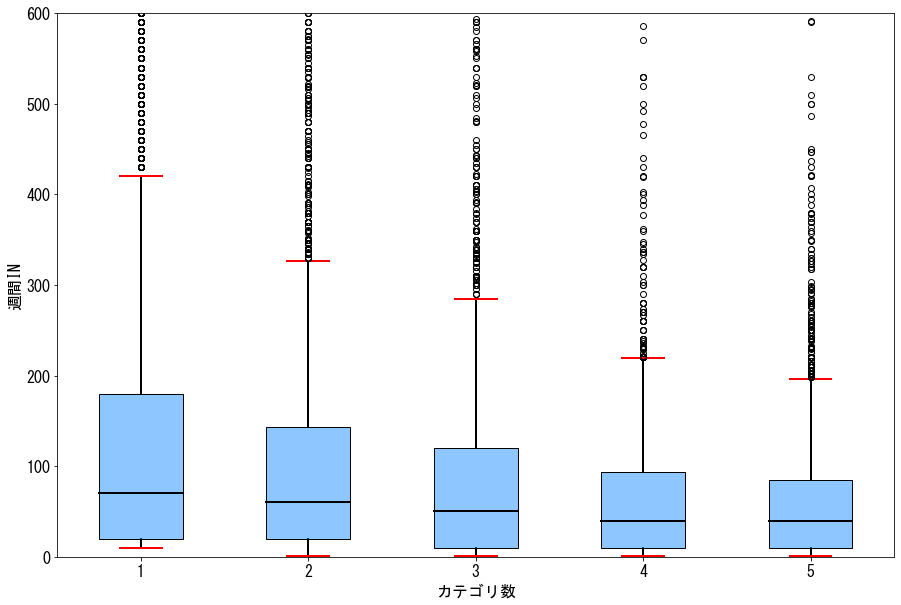

In [55]:
#更新日時の無い記事及び週間IN/OUTが100以下の記事は除外する。
#①週間IN
w_in = []
#df_in = df_total.dropna(subset=['更新日時'])
df_in = df_total#[df_total['週間IN'] >= 100].reset_index(drop=True)
for i in range(1,6):
    _df = df_in[df_in['カテゴリ数']==i]
    w_in.append(_df['週間IN'].to_numpy())
    print(len(_df))
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ数')
ax.set_ylabel('週間IN')
ax.set_ylim(0, 600)
bp=ax.boxplot(w_in,
              labels=['1','2','3','4','5'],
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )

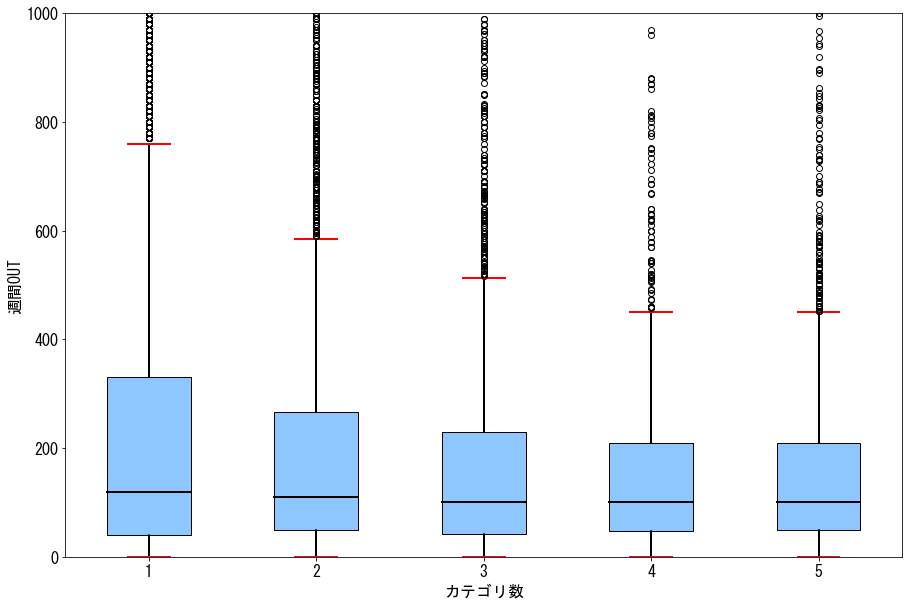

In [56]:
#更新日時の無い記事及び週間IN/OUTが100以下の記事は除外する。
#①週間IN
w_out = []
#df_out = df_total.dropna(subset=['更新日時'])
df_out = df_total#[df_total['週間OUT_'] >= 100].reset_index(drop=True)
for i in range(1,6):
    _df = df_out[df_out['カテゴリ数']==i]
    w_out.append(_df['週間OUT_'].to_numpy())
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 16
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('カテゴリ数')
ax.set_ylabel('週間OUT')
ax.set_ylim(0, 1000)
bp=ax.boxplot(w_out,
              labels=['1','2','3','4','5'],
              patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=2),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=2),  # ヒゲの線の設定
           capprops=dict(color='red', linewidth=2),  # ヒゲの先端の線の設定
           flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
              )

週間IN/OUTともにカテゴリ数が少ない方が、上位50%において多くなっている。  
↳カテゴリ数は1つがベスト

In [57]:
#合計件数
lis = []
su = 0
for z in range(0,len(df_na)):
    name = df_na['カテゴリ名'][z]
    df_bl = pd.read_csv(f'traial_{dir_n}/data/blog_list_{z}.csv',encoding='CP932')
    le = len(df_bl)
    su += le
    d = {'カテゴリ名':name,'件数':le}
    lis.append(d)
    d={}
df = pd.DataFrame(lis)
print(su)

36108
